# Validate Accuracy Scores

In [1]:
import os
import pandas as pd
from sklearn.metrics import root_mean_squared_error, r2_score
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
inputDict = {
    'JASMIN-NL':'/vol/tensusers2/wharmsen/JASMIN-fluency-features/comp-q-read_nl_age7-11_nat',
    'JASMIN-VL':'/vol/tensusers2/wharmsen/JASMIN-fluency-features/comp-q-read_vl_age7-11_nat',
    'SERDA-NL':'/vol/tensusers2/wharmsen/SERDA-fluency-features/comp1'
}

corrDF_list = []
combiDF_list = []
for corpus, basepath in inputDict.items():
    print(corpus)

    manFile_inter = os.path.join(basepath,'06_manual_fluency_features/json-fluency-features/inter_timing.tsv')
    manDF_inter = pd.read_csv(manFile_inter, sep = '\t', index_col=0).sort_index()
    manFile_intra = os.path.join(basepath,'06_manual_fluency_features/json-fluency-features/intra_timing.tsv')
    manDF_intra = pd.read_csv(manFile_intra, sep = '\t', index_col=0).sort_index()
    manDF = pd.concat([manDF_inter, manDF_intra], axis=1)

    accVars = list(manDF.columns)
    accVars.remove('other') if 'other' in list(manDF.columns) else list(manDF.columns)
    print('accVars: ', accVars)   

    asrSystem = 'whispert_vad_dis'
    autoFile_inter = os.path.join(basepath,'05_automatic_fluency_features/' + asrSystem + '/inter_timing.tsv')
    autoDF_inter = pd.read_csv(autoFile_inter, sep = '\t', index_col=0).sort_index()
    autoFile_intra = os.path.join(basepath,'05_automatic_fluency_features/' + asrSystem + '/intra_timing.tsv')
    autoDF_intra = pd.read_csv(autoFile_intra, sep = '\t', index_col=0).sort_index()
    autoDF = pd.concat([autoDF_inter, autoDF_intra], axis=1)
    autoDF.columns = [asrSystem + '_' + x for x in autoDF.columns]

    combiDF = pd.concat([autoDF, manDF], axis=1)
    combiDF['corpus'] = [corpus] * len(combiDF)
    # combiDF = combiDF.dropna()
    print('Length combiDF:', len(combiDF))
    combiDF_list.append(combiDF)

# outputCorrDF = pd.concat(corrDF_list, axis=1)
combiDF_final = pd.concat(combiDF_list)


JASMIN-NL
Length combiDF: 142
JASMIN-VL
Length combiDF: 84
SERDA-NL
Length combiDF: 18


In [32]:
asrSystem = 'whispert_vad_dis'
corrDF_list = []

for corpus in ['total', 'JASMIN-NL', 'JASMIN-VL', 'SERDA-NL']:
    outputList = []

    if corpus != 'total':
        selDF = combiDF_final[combiDF_final['corpus'] == corpus]
    else:
        selDF = combiDF_final
    print(corpus, len(selDF))

    for accVar in accVars:
        # Select only the automatic and manual variable
        autoVar = asrSystem + '_' + accVar
        manVar = accVar
        varDF = selDF.loc[:, [autoVar, manVar]].replace(0, np.nan, inplace=False).dropna()
        length = len(varDF)
        corr = stats.pearsonr(varDF[asrSystem + '_' + accVar], varDF[accVar])[0]
        outputList.append([accVar, length, corr])

    corrDF = pd.DataFrame(outputList, columns = ['var', 'N', corpus]).set_index('var')
    print(len(corrDF))
    corrDF_list.append(corrDF)

outputCorrDF = pd.concat(corrDF_list, axis=1)
outputCorrDF

total 244
22
JASMIN-NL 142
22
JASMIN-VL 84
22
SERDA-NL 18
22


,N,total,N,JASMIN-NL,N,JASMIN-VL,N,SERDA-NL
var,,,,,,,,
inter_count,244,0.993587,142,0.993713,84,0.993828,18,0.729843
inter_mean,244,0.032570,142,0.188141,84,0.696684,18,0.638130
inter_std,244,0.219991,142,0.299758,84,0.615160,18,0.558195
inter_min,244,-0.041368,142,0.008019,84,0.492285,18,0.370305
inter_25%,244,-0.180544,142,-0.072488,84,0.417137,18,0.402812
inter_50%,244,-0.127876,142,-0.025842,84,0.262794,18,0.607320
inter_75%,244,-0.037612,142,0.014406,84,0.464404,18,0.689538
inter_max,244,0.335217,142,0.364528,84,0.548237,18,0.566574
inter_IQR,244,0.087354,142,0.066166,84,0.416650,18,0.662028


In [12]:
outputCorrDF

,N,JASMIN-NL,N,JASMIN-VL,N,SERDA-NL
var,,,,,,
inter_count,142,0.995496,84,0.988512,18,0.730362
inter_mean,142,0.687041,84,0.244133,18,0.820397
inter_std,142,0.543056,83,0.551059,18,0.830599
inter_min,142,0.448335,84,0.171606,18,0.341371
inter_25%,142,0.390609,84,0.020552,18,-0.005689
inter_50%,142,0.387467,84,-0.050571,18,0.198975
inter_75%,142,0.655457,84,0.138905,18,0.367849
inter_max,142,0.477771,84,0.422568,18,0.801966
inter_IQR,142,0.680769,83,0.357705,18,0.589565


Observaties:
- JASMIN-NL: Lage correlaties voor ins_perc en sub_perc
- JASMIN-VL: Lage correlaties voor sub_perc
- SERDA-NL: Lage correlaties voor veel variabelen vooral vergeleken met JASMIN. del_perc en ins_perc zijn het laagst.

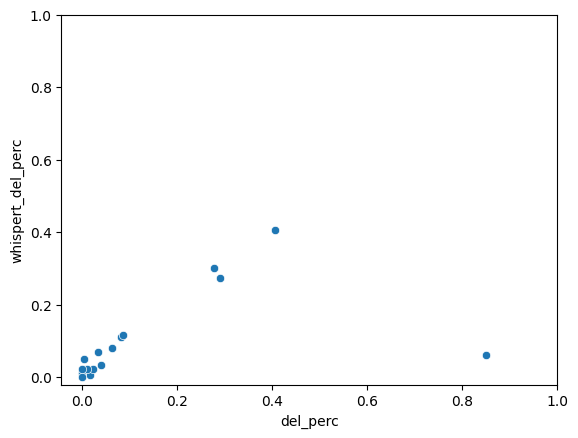

In [52]:
serda_combiDF = combiDF_list[2]
sns.scatterplot(serda_combiDF, x = 'del_perc', y='whispert_del_perc')
plt.xticks(np.arange(0,1.2,0.2))
plt.yticks(np.arange(0,1.2,0.2))
plt.show()

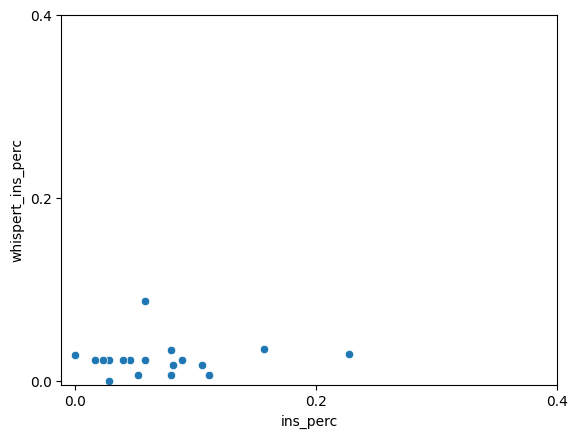

In [54]:
serda_combiDF = combiDF_list[2]
sns.scatterplot(serda_combiDF, x = 'ins_perc', y='whispert_ins_perc')
plt.xticks(np.arange(0,0.6,0.2))
plt.yticks(np.arange(0,0.6,0.2))
plt.show()

Conclusie: whispert herkent deleties vrij goed, op één punt na.

In [55]:
def DF2Latex(outputDF, column_list, txt):
    latex_table = outputDF.to_latex(index=True,
                        columns = column_list,
                        formatters={"name": str.upper},
                        float_format="{:.2f}".format,
                        caption=txt)
    
    # with open(outputFile, 'w') as f:
    #     f.write(latex_table.replace('_', '-'))
    return latex_table.replace('_', '-')

DF2Latex(outputCorrDF, ['auto_var', 'JASMIN-NL', 'JASMIN-VL', 'SERDA-NL'], 'validation')

'\\begin{table}\n\\caption{validation}\n\\begin{tabular}{lrrr}\n\\toprule\n & JASMIN-NL & JASMIN-VL & SERDA-NL \\\\\nvar &  &  &  \\\\\n\\midrule\nnr-correct & 1.00 & 1.00 & 0.66 \\\\\nnr-incorrect & 0.92 & 0.97 & 0.68 \\\\\nnr-prompts & 1.00 & 1.00 & 1.00 \\\\\ndur-sec & 1.00 & 1.00 & 0.83 \\\\\ndur-min & 1.00 & 1.00 & 0.83 \\\\\nwcpm & 0.99 & 1.00 & 0.95 \\\\\nperc-cor & 0.87 & 0.99 & 0.68 \\\\\ncor & 1.00 & 1.00 & 0.65 \\\\\nsub & 0.78 & 0.83 & 0.75 \\\\\ndel & 0.99 & 0.97 & 0.44 \\\\\nins & 0.39 & 0.72 & 0.00 \\\\\nsub-perc & 0.53 & 0.59 & 0.73 \\\\\ndel-perc & 0.98 & 0.79 & 0.45 \\\\\nins-perc & 0.22 & 0.74 & 0.02 \\\\\ncor-perc & 0.85 & 0.99 & 0.67 \\\\\ncor-prompt-perc & 0.87 & 0.99 & 0.68 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'